#   Graph implementation

In this notebook I have implemented my own classes to represent a graph and its components and other functions necessery for processing a text.<br>
A graph consists of nodes that may or may not be connected via edges. There are two easy ways to implement it in python using an adjacency list or an adjacency matrix. In this case, I have used an adjacency list because many operations are less expensive in term of complexity on this type data structure. Yet, I have added function which can transform adjacency list to an adjacency matrix.

## Time Complexity Analysis: 

### Complexity of building the graph

- Assuming that we have a dataset containing N samples, building a graph with this dataset can be done in 2 steps:
    1. Creating a node for each sample by iterating through the dataset which will take exactly ***$O(N)$*** time.
    2. Adding edges between the nodes of the graph assuming that two nodes are connected if they share at least n tokens. Since the graph is undirected, this will take only ***$O(N\log(N))$*** time ignoring the time we spend computing the number of shared tokens. 
    
### Complexity of finding all connected components
  
- To find the component of a given graph there is many ways to do it. Here, I have implemented it as follow:
    1.  I start by initializing all the nodes as not visited. Then I iterate through all nodes, and each time I chech if the node is yet visited or not. If it wasn't visited, I call the DFS function.
    2. DFS is an implementation of the Depth-First Search algorithm. In each iteration of the for loop, it adds this node to the current component and explores their neighbors in a recurring manner.
    
    
This algorithm take ***$O(N + E)$*** time, where $E$ is the number of edges in the graph.


In [1]:
from random import choices
import pickle
import pandas as pd
import re
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

In [2]:
class Graph(object):
    """
    A class used to represent a graph.
    
    Attributes
    ----------
    nodes : dictionary
        used to store the nodes of the graph
    nodesNumber : int
        number of nodes in the graph

    Methods
    -------
    add_node(node)
        adds new node to the graph
    
    add_edge(node1, node2)
        adds edges between node1 and node1  
    
    add_edges(n)
        adds the edges between each two nodes
        if they share at least n tokens
    
    get_nodes()
        returns the list of nodes in the graph
    
    samples(n=10)
        print n random nodes with their edges
    """
    
    def __init__(self):
        """ initializes a graph object
        as an empty dictionary.
        """
        self.nodes = {}
        self.nodesNumber = 0
        self.connectedComponents = None
        
    def add_node(self, node):
        """ Adds a new node to the graph
        if doesn't exist already.
        
        Parameters
        ----------
        node : node
            the object node to add
        """
        if node in self.nodes:
            print("node ", node, " already exists in the graph")
        else:
            self.nodes[node.id] = node
            self.nodesNumber +=1
            
    def add_edge(self, node1, node2, weight):
        """ Adds an edge between node1 and node2
        if both exist in the graph.
        
        Parameters
        ----------
        node1: node
        node2: node
        """
        if node1 not in self.nodes:
            print("node ", node1.id, " doesn't exist in the graph.")
        
        elif node2 not in self.nodes:
            print("node ", node2.id, " doesn't exist in the graph.")
        
        else:
            self.nodes[node1].edges[node2] = weight
            self.nodes[node2].edges[node1] = weight
    
    
    def add_edges(self, n):
        """Adds adges bewteen each two nodes of the graph
        if they share at least n tokens.
        
        Parameters
        ----------
        n : int
            Number of tokens that each two nodes
            should share two have a link between them
        """
        nodes = list(self.nodes.keys())
        for i in range(len(nodes)):
            for j in range(i, len(nodes)):
                number_shared_tokens = intersection(self.nodes[i], self.nodes[j])
                if (i!=j) and (number_shared_tokens >= n):
                    self.add_edge(i, j, number_shared_tokens)
    
    def get_nodes(self):
        """ returns the list of the 
            nodes exist in the graph.
        """
        return list(self.nodes.keys())
    
    def samples(self, n=10):
        """Prints n random nodes form the graph.
        If the argument n isn't passed in, the 
        default value.
        
        Parameters
        ----------
        n : int, optional
            Number of samples to print (default is 10)
        """
        graph = "{"
        samples = choices(list(self.nodes.keys()), k = n)
        for i in samples:
            graph += str(self.nodes[i])+"\n"
        graph += "}"
        print(graph)
    

    def connected_components(self):
        """Finds the connected components in the graph.
        
        Returns
        -------
        components: list of lists
            each sub-list represents a connected component
        
        """
        self.connectedComponents = []
        treated_nodes = {}
        for i in self.nodes:
            treated_nodes[i] = False
        
        for i in self.nodes:
            if not treated_nodes[i]:
                temp = []
                self.DFS(i, treated_nodes, temp)
                self.connectedComponents.append(temp)
                
        return self.connectedComponents
    
    def DFS(self, nodeId, treated_nodes, component):
        component.append(nodeId)
        treated_nodes[nodeId] = True

        for j in self.nodes[nodeId].edges:
            if not treated_nodes[j]:
                self.DFS(j, treated_nodes, component)

    
    def connected_components_number(self):
        """Compute the number of components in the graph.
        
        Returns:
        --------
            :int
            number of compunent in the graph
        """
        if not self.connectedComponents:
            self.connectedComponents = self.connected_components()
        return len(self.connectedComponents)
    
    def adgjacency_matrix(G):
        matrix = []
        for i in G.nodes:
            ligne = [0 for i in range(len(G.nodes))]
            for j in G.nodes[i].edges:
                ligne[j] = G.nodes[i].edges[j]
            matrix.append(ligne)
        return matrix #np.array([m for m in matrix])
            
    def __str__(self):
        graph = "{"
        for node in self.nodes:
            graph += str(self.nodes[node])+"\n"
        graph += "}"
        return graph

In [3]:
class Node(object):
    """
    A class used to represent a node
    
    Attributes
    ----------
    id : int
        used to identify the node
    topic : str
        the topic of the article 
        represented by this node
    tokens: list of str
        list of the tokens of the article
    edges: list of int
        list of the nodes connected to this node
        
    Methods
    -------
    __str__()
        returns the id of the node with the edges 
    """
    def __init__(self, id, tokens):
        self.id = id
        self.tokens = list(tokens)
        self.edges = {}
        
    def __str__(self):  
        return "{" + str(self.id)+ ":" + str(list(self.edges.keys())) + "}\n"

In [4]:
def intersection(node1, node2):
    """Finds the number of tokens shared by two nodes
    
    Parameters
    ----------
    node1, node2 : node
    
    Returns
    -------
    int: number of tokens shared by the two nodes
    """
    return len(list(set(node1.tokens) & set(node2.tokens)))

In [5]:
# removing HTML tags from the articles
def remove_tags(text):
    """Remove HTML tags from a given text
    
    Parameters
    ----------
    text: str
        text to clean from html tags
        
    Returns
    -------
        : str
        clean text
    """
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub('', text)

In [6]:
#Set of functions used to clean a text and transform it to a list of tokens 

def extract_tokens(text):
    """Extracts tokens from a given text
    
    Parameters
    ----------
    text: str
        text to be splited to tokens
    Returns
    -------
    res : list
        list of tokens in the text
    """
    res = []
    for sent in nltk.sent_tokenize(text):
        tmp_res = nltk.word_tokenize(sent)
        for token in tmp_res:
            res += re.split("[\./]", token)
    return res


def clean_tokens(tokens):
    """Removes punctuation marks from tokens
    Parameters
    ----------
    tokens: list
        list to be cleaned from punctuation marks
    
    Returns
    -------
    list:
        list cleaned from punctuation marks
    """
    return [token.lower() for token in tokens if token not in string.punctuation]


def remove_stop_words(tokens):
    """Removes stopwords from our tokens
    
    Parameters
    ----------
    tokens: list 
        list of tokens to be cleaned from stopwords
        
    Returns
    -------
        :list
        list cleaned from stopwords
    """
    GARBAGE = {"'s", "n't", '...', 'oh',"'m", "'re", "'", "''", "'ve", "'ll", "'d", "``" }
    STOP_WORDS = set(stopwords.words('english')).union(GARBAGE)
    return [token for token in tokens if token not in STOP_WORDS]

def text2tokens(text):
    """Used to combine three previous functions in one operation.
    Parameters
    ----------
    Text: str
        text to be cleaned
    Returns
    -------
    tokens: list
        list of tokens cleaned
    """
    text = remove_tags(text)
    tokens = extract_tokens(text)
    tokens = clean_tokens(tokens)
    tokens = remove_stop_words(tokens)
    return tokens

In [7]:
#loading dataset
df = pd.read_csv("dataset_business_technology_cybersecurity.zip")

In [8]:
df.sample(8)

,title,content,topic
181,Electricity generation,<p><b>Electricity generation</b> is the proces...,technology
127,Programming language,"<p class=""mw-empty-elt"">\n\n</p>\n\n<p>A <b>pr...",technology
230,Train,"<p class=""mw-empty-elt"">\n\n</p>\n\n\n \n<p>A ...",technology
67,Management,<p><b>Management</b> (or <b>managing</b>) is t...,business
53,International trade,<p><b> International trade</b> is the exchange...,business
87,Project management,<p><b>Project management</b> is the process of...,business
1,Commerce,<p><b>Commerce</b> is the exchange of goods an...,business
157,Optical engineering,<p><b>Optical engineering</b> is the field of ...,technology


In [9]:
df["tokens"] = df["content"].apply(lambda s: text2tokens(s))

In [10]:
#create a graph using articles as nodes
G = Graph()
for index, article in df.iterrows():
    G.add_node(Node(index, article["tokens"]))

In [11]:
#Adding edges between each two nodes if they share 100 tokens
G.add_edges(100)

In [12]:
#computing connected components
connected_components = G.connected_components()

In [13]:
for component in  connected_components:
    print(component)
    print("--------------------")

[0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 11, 25, 12, 17, 15, 37, 16, 18, 19, 20, 21, 38, 22, 23, 28, 29, 30, 31, 32, 33, 34, 35, 39, 40, 41, 36, 43, 42, 44, 45, 50, 27, 98, 46, 47, 51, 52, 55, 53, 56, 54, 57, 58, 59, 64, 65, 62, 85, 60, 67, 66, 72, 68, 73, 69, 87, 70, 75, 71, 81, 74, 77, 79, 80, 48, 82, 83, 84, 86, 89, 88, 124, 91, 92, 93, 94, 95, 96, 97, 100, 99, 103, 104, 105, 107, 108, 101, 110, 109, 111, 112, 113, 117, 114, 115, 118, 120, 121, 119, 123, 122, 140, 125, 126, 127, 116, 128, 129, 131, 132, 133, 135, 136, 134, 137, 138, 139, 141, 142, 143, 144, 145, 146, 155, 147, 148, 150, 151, 160, 152, 162, 154, 159, 158, 168, 153, 166, 170, 161, 172, 163, 165, 174, 164, 179, 178, 169, 183, 171, 180, 173, 184, 175, 185, 176, 190, 181, 186, 182, 192, 187, 191, 194, 195, 188, 200, 189, 196, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 177, 231, 216, 217, 219, 220, 221, 222, 223, 224, 225, 226, 227, 229, 230, 232, 233, 234, 235, 245, 251, 252,

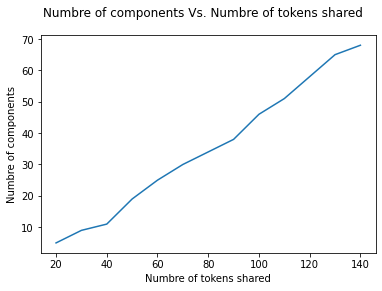

In [17]:
def plot_graph(df):
    tokens_number = []
    component_number = []
    for n in range(20, 150, 10):
        G = Graph()
        for index, article in df.iterrows():
            G.add_node(Node(index, article["tokens"]))
        G.add_edges(n)
        tokens_number.append(n)
        component_number.append(len(G.connected_components()))
    plt.plot(tokens_number,component_number)
    plt.xlabel("Numbre of tokens shared")
    plt.ylabel("Numbre of components")
    plt.suptitle('Numbre of components Vs. Numbre of tokens shared')
    plt.show()
plot_graph(df)

### Discussion on the graph clustering results

Since we only take in consideration the fact that two nodes are considered to be connected if they share at least n tokens, the component search algorithm does not give a satisfied results and that's because it's a deterministic algorithm and it does not fit our case and the criterion for adding the edges between the nodes is not discriminating and it strongly depends on the choice of n. 

As we can see in the graph above, if we choose a small value for n we will have small number of clusters and the most of the articles will be classified in one cluster and each article of the rest will be considered as a cluter alone and that because they don't have a lot of tokens. But, if we try to increase the value of n we may get a better classification, yet the problem of short articles will increase as well and we will have a lot of clusters. Therefore, the choice of tokens number raises a big chanllenge. 

Perhaps if we modify it to take into account the frequency of each world or by analogy with the k-means, we can try to maximize the number of tokens shared within a cluster or we can dig deeper by using an algebraic approach based on the adjacency matrix, we could find a better results.

A similar algorithm of machine learning that could achieve a better results, it would be K-means